             Day  Interaction  Residences   Knowledge    Rainfall  \
count  547.00000   547.000000  547.000000  547.000000  547.000000   
mean   274.00000    19.908592    6.837294   21.036563   23.371115   
std    158.04957     5.106455    1.774111    5.465722    4.223964   
min      1.00000     6.000000    2.000000    7.000000   16.000000   
25%    137.50000    16.000000    5.000000   17.000000   20.000000   
50%    274.00000    21.000000    7.000000   21.000000   22.000000   
75%    410.50000    24.000000    8.000000   25.000000   27.500000   
max    547.00000    30.000000   10.000000   35.000000   31.000000   

       Humidity (%)  Temperature         Power  
count    547.000000   547.000000    547.000000  
mean      81.023766    20.804388   7403.159963  
std       12.453333     8.281458   5693.996608  
min       55.000000    10.000000    110.000000  
25%       70.000000    10.000000   3753.000000  
50%       80.000000    20.000000   6790.000000  
75%       90.000000    30.000000   

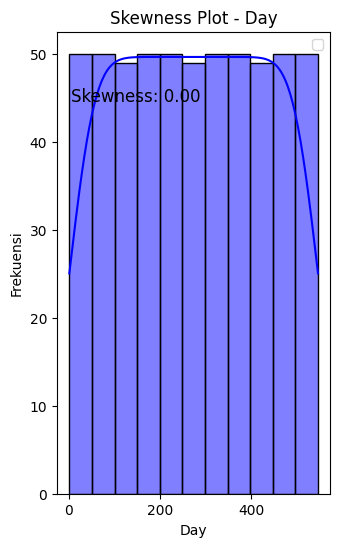

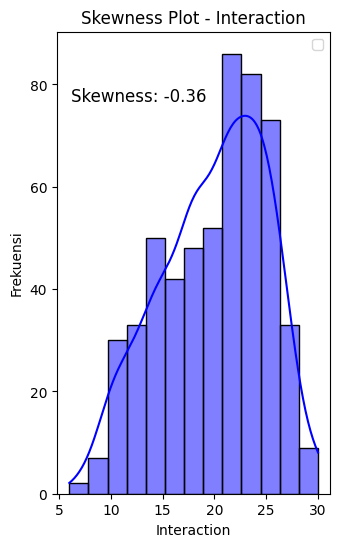

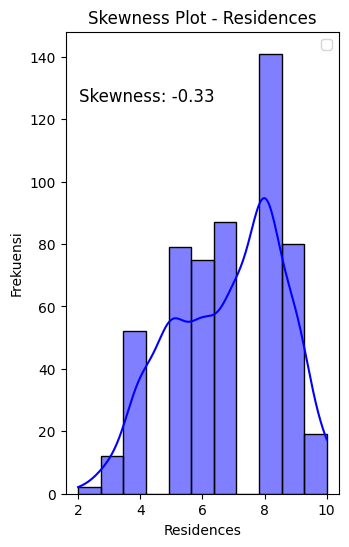

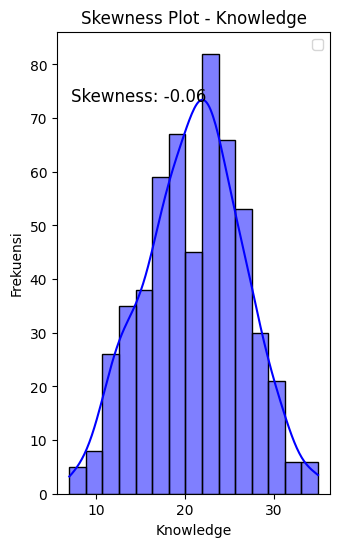

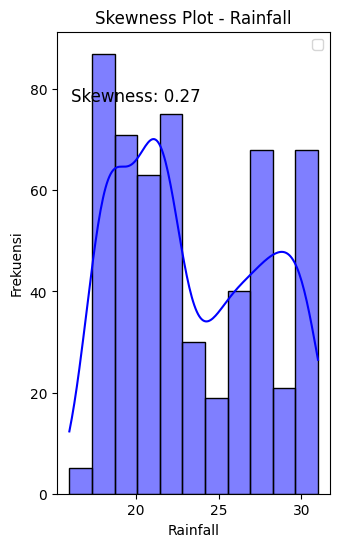

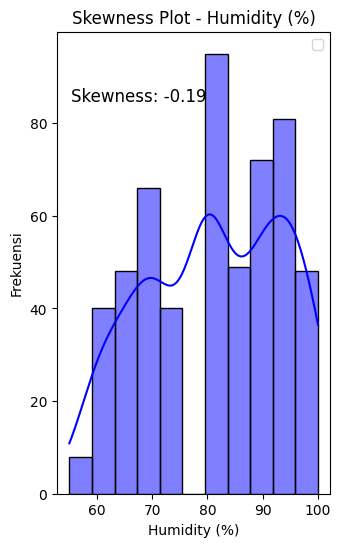

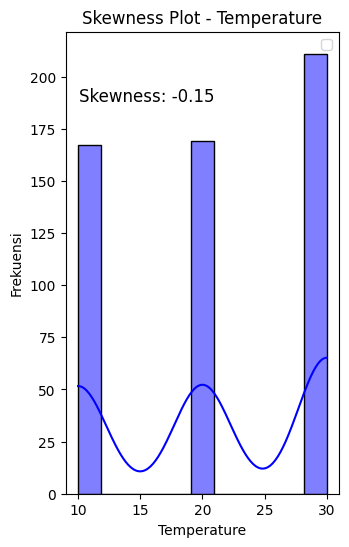

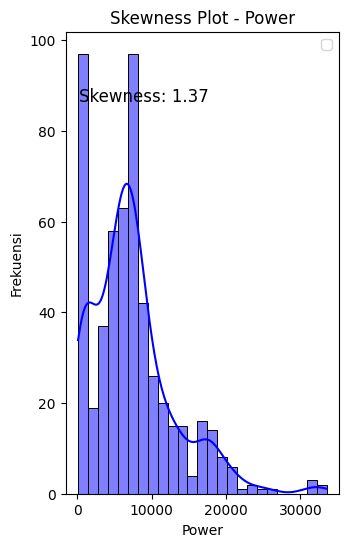

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import statsmodels.api as sm
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Assuming 'data' is your DataFrame
# Replace it with your actual dataset or data loading code
data = pd.read_csv('data_uas.csv', sep=',', header=0, engine='python', encoding='utf-8')

# Soal A
# Descriptive statistics
descriptive_stats = data.describe()

# Display the results
print(descriptive_stats)

# Interpretasi
print("\nInterpretasi Statistik Deskriptif:")
print("===================================")

# Hari (Day)
print("\nHari (Day):")
print("Data ini mencakup 548 observasi dengan nilai rata-rata hari sebesar {:.2f}.".format(descriptive_stats.loc['mean', 'Day']))

# Interaksi (Interaction)
print("\nInteraksi (Interaction):")
print("Variabel interaksi memiliki nilai rata-rata {:.2f} dengan deviasi standar {:.2f}.".format(descriptive_stats.loc['mean', 'Interaction'], descriptive_stats.loc['std', 'Interaction']))

# Tempat Tinggal (Residences)
print("\nTempat Tinggal (Residences):")
print("Variabel Tempat Tinggal memiliki total 704 dengan nilai rata-rata {:.2f}.".format(descriptive_stats.loc['mean', 'Residences']))

# Pengetahuan (Knowledge)
print("\nPengetahuan (Knowledge):")
print("Variabel Pengetahuan memiliki nilai rata-rata {:.2f} dengan deviasi standar {:.2f}.".format(descriptive_stats.loc['mean', 'Knowledge'], descriptive_stats.loc['std', 'Knowledge']))

# Curah Hujan (Rainfall)
print("\nCurah Hujan (Rainfall):")
print("Variabel Curah Hujan memiliki nilai minimum {:.2f} dan nilai maksimum {:.2f}.".format(descriptive_stats.loc['min', 'Rainfall'], descriptive_stats.loc['max', 'Rainfall']))

# Kelembaban (%) (Humidity (%))
print("\nKelembaban (%):")
print("Variabel Kelembaban memiliki nilai rata-rata {:.2f} dengan deviasi standar {:.2f}.".format(descriptive_stats.loc['mean', 'Humidity (%)'], descriptive_stats.loc['std', 'Humidity (%)']))

# Suhu (Temperature)
print("\nSuhu (Temperature):")
print("Variabel Suhu memiliki nilai rata-rata {:.2f} dengan deviasi standar {:.2f}.".format(descriptive_stats.loc['mean', 'Temperature'], descriptive_stats.loc['std', 'Temperature']))

# Daya (Power)
print("\nDaya (Power):")
print("Variabel Daya memiliki nilai rata-rata {:.2f} dan nilai maksimum {:.2f}.".format(descriptive_stats.loc['mean', 'Power'], descriptive_stats.loc['max', 'Power']))

print("\n")

# Soal B
# Check validity and reliability (example: using correlation matrix)
correlation_matrix = data.corr()

# Display the correlation matrix
print("\nMatrix Korelasi:")
print(correlation_matrix)

# Soal C
# Descriptive statistics for specific columns
power_stats = data['Power'].describe()
humidity_stats = data['Humidity (%)'].describe()
rainfall_stats = data['Rainfall'].describe()

# Display the results
print("\nPower Stats:", power_stats)
print("\n")
print("Humidity Stats:", humidity_stats)
print("\n")
print("Rainfall Mean:", rainfall_stats)

import logging
logging.getLogger().setLevel(logging.CRITICAL)


# Soal D

data = data.dropna()

numeric_columns = data.select_dtypes(include=[float, int]).columns

for column in numeric_columns:
    skewness_value = data[column].skew()

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    sns.histplot(data[column], kde=True, color='blue', edgecolor='black')
    plt.annotate(f'Skewness: {skewness_value:.2f}', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=12)
    plt.title(f'Skewness Plot - {column}')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')
    plt.legend()

# Compute skewness
for column in data:
    print(f"Skewness - {column} : ", (skew(data[column])))

# Soal E
# Standardize data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

print(data_standardized)
# Use data_standardized for further analysis

# Soal F
# Simple linear regression
X = sm.add_constant(data[['Day','Interaction','Residences','Knowledge','Rainfall','Humidity (%)','Temperature' ]])
y = data['Power']

model = sm.OLS(y, X).fit()
print(model.summary())

# Soal G
print(model.summary())

# Soal H
#Uji Kebaikan Model menggunakan R-squared
r_squared = model.rsquared
print(f"\nR-Squared (Koefisien Determinasi) untuk model dengan 10 variabel numerik:")
print(f"R-Squared: {r_squared}")
